<a href="https://colab.research.google.com/github/josephinepurek/Marketing_Analytics/blob/main/Veronika_Josephine_Purek_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Veronika Josephine Purek  
### Dataset: https://www.kaggle.com/jackdaoud/marketing-data 
### Topic: "**Marketing Analytics**"

# Import Package

In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from datetime import date
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#!pip install shap
import shap

# Import Data

In [ ]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Data Science Bootcamp/Final Project Bootcamp

/content/gdrive/MyDrive/Data Science Bootcamp/Final Project Bootcamp


In [ ]:
#Read dataset and save as pandas dataframe
df = pd.read_csv('marketing_data.csv',encoding ='latin')

In [ ]:
df

,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [ ]:
#Display 10 rows randomly
df.sample(10)

,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
100,6715,1948,PhD,Single,"$60,200.00",0,1,1/2/13,3,502,19,132,0,6,26,6,6,2,11,6,0,0,0,0,0,0,0,SP
2112,11074,1977,Graduation,Single,"$85,072.00",0,0,4/9/14,94,494,92,391,194,11,241,1,3,4,10,0,0,0,0,0,0,0,0,SA
2226,1743,1974,Graduation,Single,"$69,719.00",0,0,5/26/14,99,273,86,208,177,14,43,1,2,3,5,1,0,0,0,0,0,0,0,SP
434,10102,1966,Graduation,Widow,"$79,946.00",0,0,5/12/14,19,395,183,565,166,141,28,1,5,11,5,3,0,0,0,0,0,0,0,SA
1092,2591,1959,Graduation,Widow,"$76,320.00",0,1,6/22/14,49,526,35,214,69,53,35,2,6,3,4,2,0,0,0,0,0,0,0,US
986,2694,1967,Graduation,Married,"$42,664.00",0,1,3/18/14,44,21,0,3,0,0,0,1,1,0,3,6,0,0,0,0,0,0,0,SP
130,2429,1954,Graduation,Divorced,"$72,071.00",0,1,2/14/13,4,531,69,300,150,138,150,3,5,4,8,2,0,0,0,0,0,0,0,CA
2019,2975,1976,Graduation,Together,"$85,606.00",0,1,11/12/12,89,717,42,864,219,30,84,2,6,7,9,3,0,0,0,1,0,0,0,SP
356,5231,1974,2n Cycle,Married,"$45,894.00",0,2,2/27/14,15,27,2,7,0,2,13,1,1,0,3,5,0,0,0,0,0,0,0,SP
716,10602,1983,Graduation,Married,"$39,922.00",1,0,2/14/13,30,29,12,59,19,1,36,2,3,0,4,8,0,0,0,0,0,0,0,IND


# Data Interpretation

Attributes information:
1. `ID` - customer ID number
2. `Year_Birth` - customer year of birth
3. `Education` - customer's level of education 
4. `Marital Status` - customer's marital status
5. `Income` - customer's yearly household income
6. `Kidhome` - number of small children in customer's household
7. `Teenhome` - number of teenagers in customer's household 
8. `Dt_Customer` - date of customer's enrollment with the company
9. `Recency` - number of days since the last purchase
10. `MntWines` - amount spent on wines in the last 2 years
11. `MntFruits` - amount spent on fruits in the last 2 years  
12. `MntMeatProducts` - amount spent on meat products in the last 2 years
13. `MntFishProducts`: amount spent on fish products in the last 2 years
14. `MntSweetProducts`: amount spent on sweet products in the last 2 years
15. `MntGoldProds`: amount spent on gold products in the last 2 years
16. `NumDealsPurchases`: number of purchases made with discount
17. `NumWebPurchases`: number of purchases made through company's website
18. `NumCatalogPurchases`: number of purchases made using catalogue
19. `NumStorePurchases`: number of purchases made directly in stores
20. `NumWebVisitsMonth`: number of visits to company's website in the last month
21. `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
22. `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
23. `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
24. `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
25. `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
26. `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise
26. `Complain`: 1 if customer complained in the last 2 years
26. `Country`: customers's country


In [ ]:
#Get dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ï»¿ID                2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
#Get summary statistics for numerical columns
df.describe()

,ï»¿ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- There are 2240 rows of data with 28 columns
- The target variable that we want to predict is Response. 

# Data Cleaning & Preprocessing

## Missing Values Handling

In [ ]:
#Check null values of every attributes
df.isnull().sum()

ï»¿ID                   0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

We found that there's missing values in these dataset, to be exact in feature `Income`. But to make sure before jumping on to the next step, we will try to summarize unique values of each attribute.

In [ ]:
#Get unique values for each of the column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*10)
    print()

Column: ï»¿ID
[ 1826     1 10476 ...    22   528  4070]

Column: Year_Birth
[1970 1961 1958 1967 1989 1954 1947 1979 1959 1981 1969 1977 1960 1966
 1976 1965 1956 1975 1971 1986 1972 1974 1990 1987 1984 1968 1955 1983
 1973 1978 1952 1962 1964 1982 1963 1957 1980 1945 1949 1948 1953 1946
 1985 1992 1944 1951 1988 1950 1994 1993 1991 1893 1996 1995 1899 1943
 1941 1940 1900]

Column: Education
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Column: Marital_Status
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

Column: Income
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Column: Kidhome
[0 1 2]

Column: Teenhome
[0 1 2]

Column: Dt_Customer
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5

Since, there is no "weird" values that can be categorized as missing values, we will proceed to next step to handle missing values in feature `Income`. Since the rows with missing values on feature `Income` is only around 1%, we will decide to drop these rows.

In [ ]:
#drop column with missing values
df = df.dropna(subset=['Income'])

df

,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


We already finished to handle all the missing values in the dataframe, then we will perform next step to check on duplicate row on the dataframe.

## Duplicate Rows Handling

In [ ]:
len(df.drop_duplicates()) / len(df)

1.0

There are no duplicate rows in this dataset, hence we will proceed to the next step using the data as it is.

## Unuseful Column Handling

Since the first column will not be used in our model (do not have additional value) we will drop that column. Also, we will not try to reduce the scope of market that will be offered the campaign, using the data of previous campaign, because that is not our goal to only target the customer based on the acceptance of previous campaign. Since we will not use the historical data of user acceptance of the previous campaign, we will drop the feature `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, and `AcceptedCmp5`.

In [ ]:
#drop unused column
df = df.drop(columns = ['ï»¿ID'] + [x for x in df.columns if 'AcceptedCmp' in x])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country
0,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,1,0,CA
2,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,US
3,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,AUS
4,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,US
2236,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,SP
2237,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,SP
2238,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,IND


## Feature Engineering

We will perform feature engineering for feature `Dt_Customer`. We will generate new feature of `Tenure_Days` which reflect how long the User ID has been registered as our customer. We also can generate another new feature of `Age_when_enrolled` to analyze in which age segment does our customer mainly come from. Lastly, we will clean the feature `Income` hence it can be used as numeric datatype. 

### New Feature `Tenure_Days`

First, we will assume that the dataset is analyzed on 31th October of 2021. This date will be used as the cutoff time to generate new feature `Tenure_Days`

In [ ]:
#feature engineering of 'Tenure_Days'
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer']) #transform 'Dt_Customer' into datetime datatype
datenow = date(2021, 10, 31) #define cutoff time
tenure = [] #create new list to contain new feature

for d in df['Dt_Customer'].dt.date:
  t = datenow - d
  tenure.append(t)

df.insert(loc=22, column='Tenure_Days', value = tenure) #insert tenure list into our dataframe 'df'
df['Tenure_Days'] = df['Tenure_Days'].dt.days #extract only the number of tenure in unit days

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Tenure_Days
0,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,SP,2694
1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,CA,2695
2,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,US,2728
3,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,AUS,2730
4,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,SP,2763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,"$66,476.00",0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,US,3160
2236,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,SP,3204
2237,1976,Graduation,Divorced,"$46,310.00",1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,SP,3254
2238,1978,Graduation,Married,"$65,819.00",0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,IND,3258


### New Feature `Age_when_enrolled`

In [ ]:
#feature engineering of 'Age_when_enrolled'
df['Age_when_enrolled'] = df['Dt_Customer'].dt.year - df['Year_Birth'] #find the age of user when enrolled as our customer

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Tenure_Days,Age_when_enrolled
0,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,1,0,SP,2694,44
1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,1,0,CA,2695,53
2,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,US,2728,56
3,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,AUS,2730,47
4,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,SP,2763,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,"$66,476.00",0,1,2013-03-07,99,372,18,126,47,48,78,2,5,2,11,4,0,0,US,3160,37
2236,1977,2n Cycle,Married,"$31,056.00",1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,SP,3204,36
2237,1976,Graduation,Divorced,"$46,310.00",1,0,2012-12-03,99,185,2,88,15,5,14,2,6,1,5,8,0,0,SP,3254,36
2238,1978,Graduation,Married,"$65,819.00",0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,IND,3258,34


In [ ]:
#We will drop feature `Year_Birth` and `Dt_Customer` because it will bring no use, since we already transfer this information to `Age_when_enrolled`
df = df.drop(columns = ['Year_Birth', 'Dt_Customer'])
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Tenure_Days,Age_when_enrolled
0,Graduation,Divorced,"$84,835.00",0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,SP,2694,44
1,Graduation,Single,"$57,091.00",0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,CA,2695,53
2,Graduation,Married,"$67,267.00",0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,US,2728,56
3,Graduation,Together,"$32,474.00",1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,AUS,2730,47
4,Graduation,Single,"$21,474.00",1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,SP,2763,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,"$66,476.00",0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,US,3160,37
2236,2n Cycle,Married,"$31,056.00",1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,SP,3204,36
2237,Graduation,Divorced,"$46,310.00",1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,SP,3254,36
2238,Graduation,Married,"$65,819.00",0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,IND,3258,34


### Feature `Income` 

In [ ]:
#Transform feature education from string type to numeric hence it can be used in our model
df = pd.DataFrame(df)
chars_to_remove = ['$', '.00 ', ',']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
df['Income'] = df['Income'].str.replace(regular_expression, '', regex=True)
df['Income'] = pd.to_numeric(df['Income'])

df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Tenure_Days,Age_when_enrolled
0,Graduation,Divorced,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,SP,2694,44
1,Graduation,Single,5791,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,CA,2695,53
2,Graduation,Married,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,US,2728,56
3,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,AUS,2730,47
4,Graduation,Single,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,SP,2763,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,US,3160,37
2236,2n Cycle,Married,3156,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,SP,3204,36
2237,Graduation,Divorced,4631,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,SP,3254,36
2238,Graduation,Married,65819,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,IND,3258,34


## Outlier Handling

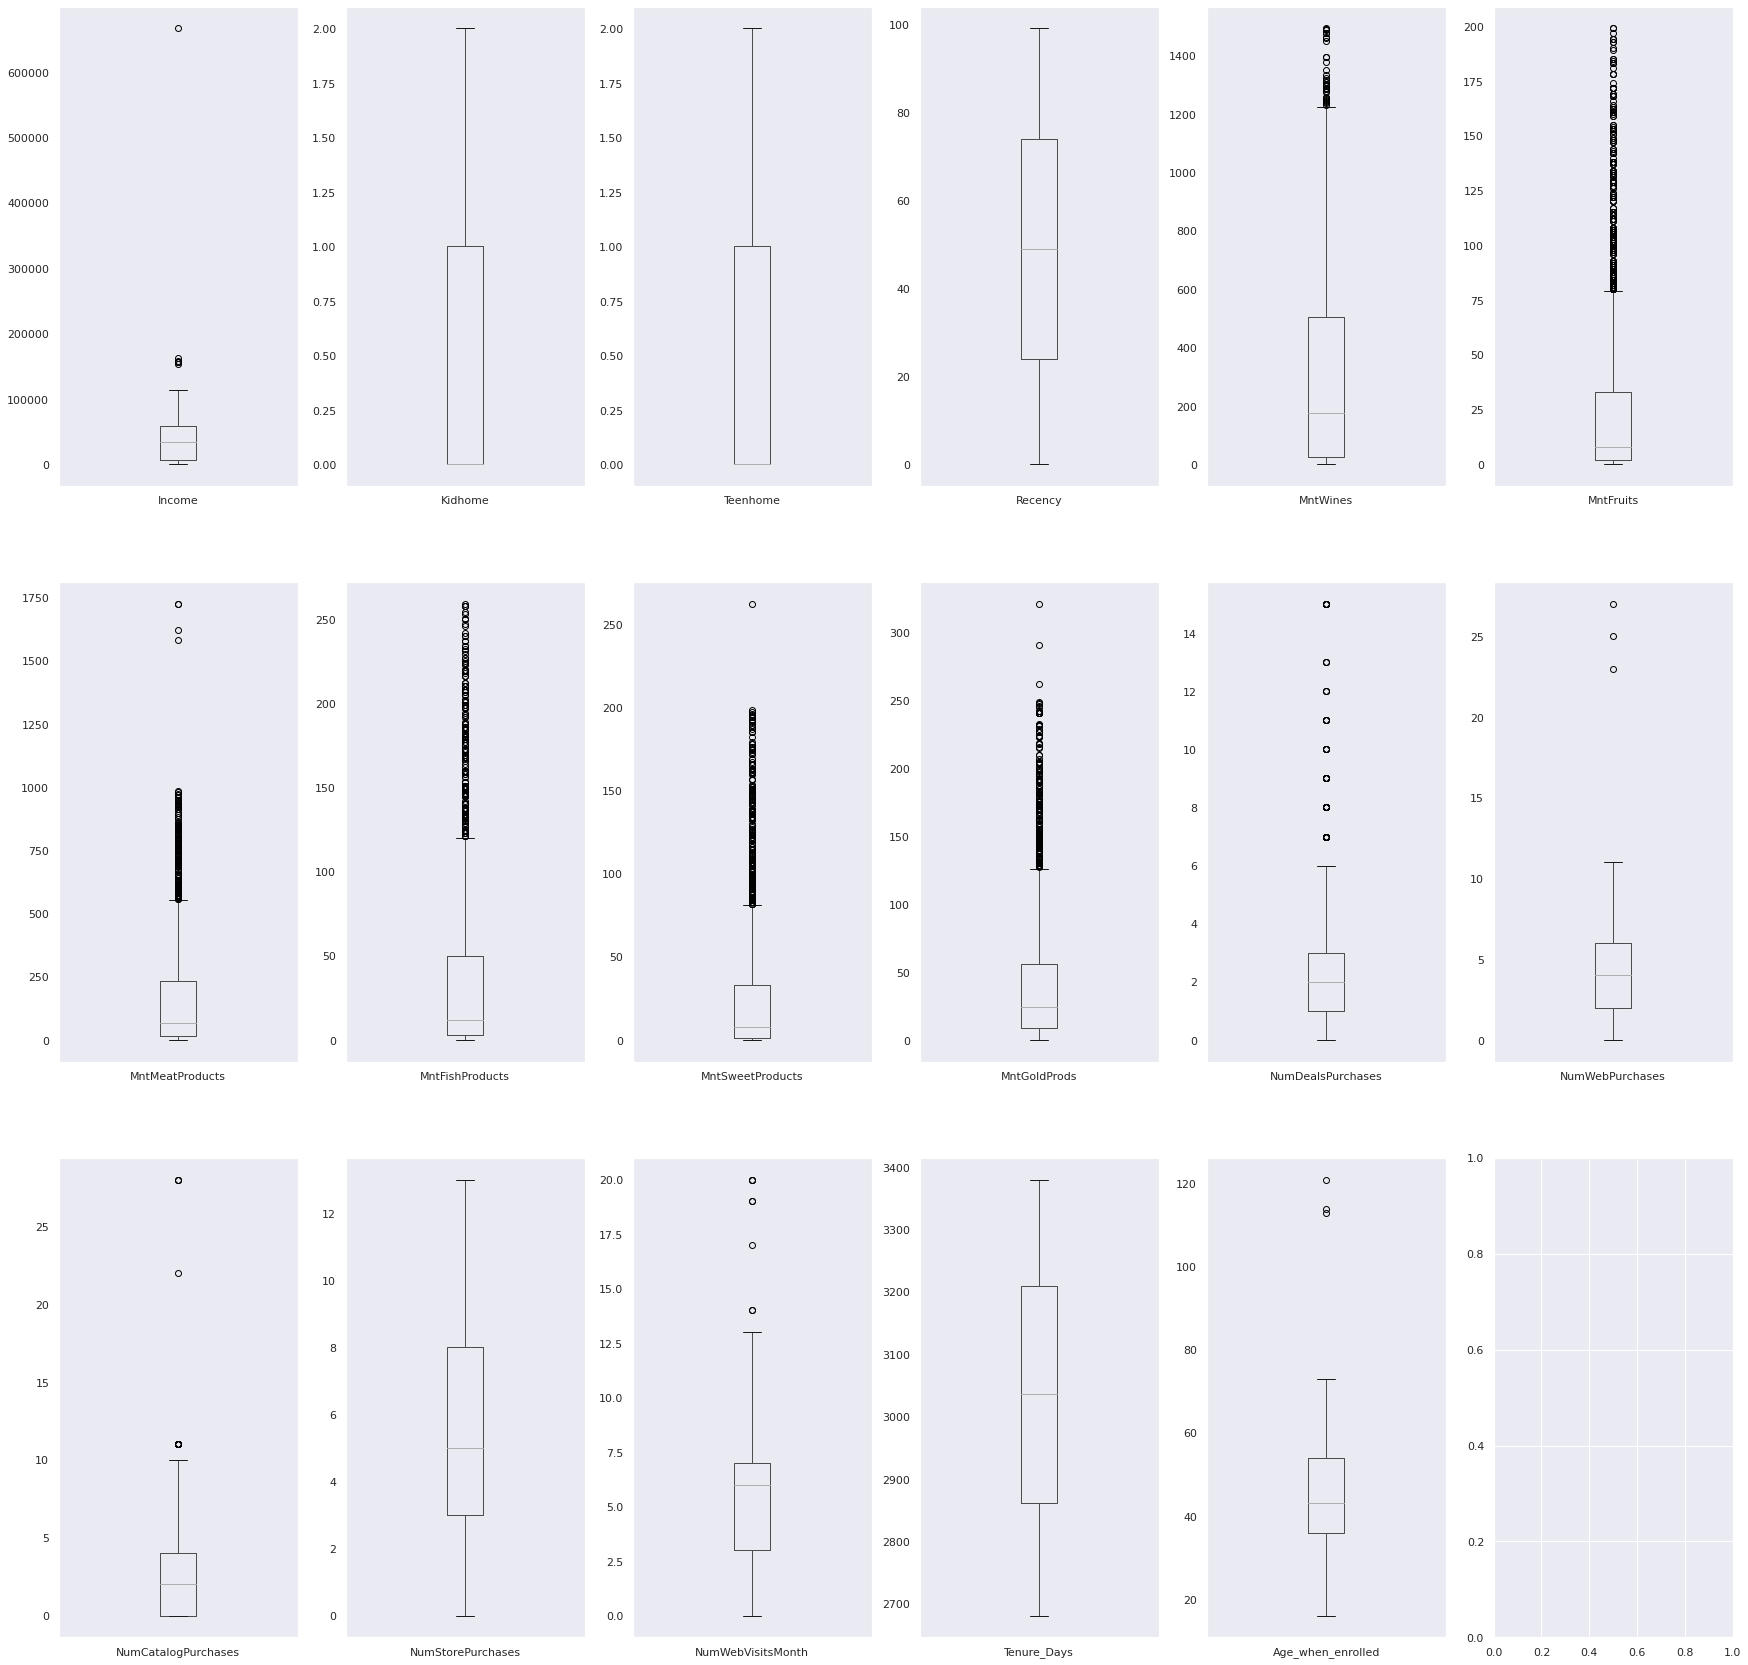

In [ ]:
#Check the outlier existence on continuous data
feature = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Tenure_Days', 'Age_when_enrolled']
fig, axes = plt.subplots(nrows=3, ncols=6,figsize=(30,30))

for i,el in enumerate(feature):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)

plt.show()

We find that there are outlier in feature `Income`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumWebVisitsMonth`, and `Age_when_enrolled`. We also will check the data distribution using KDE Plot.

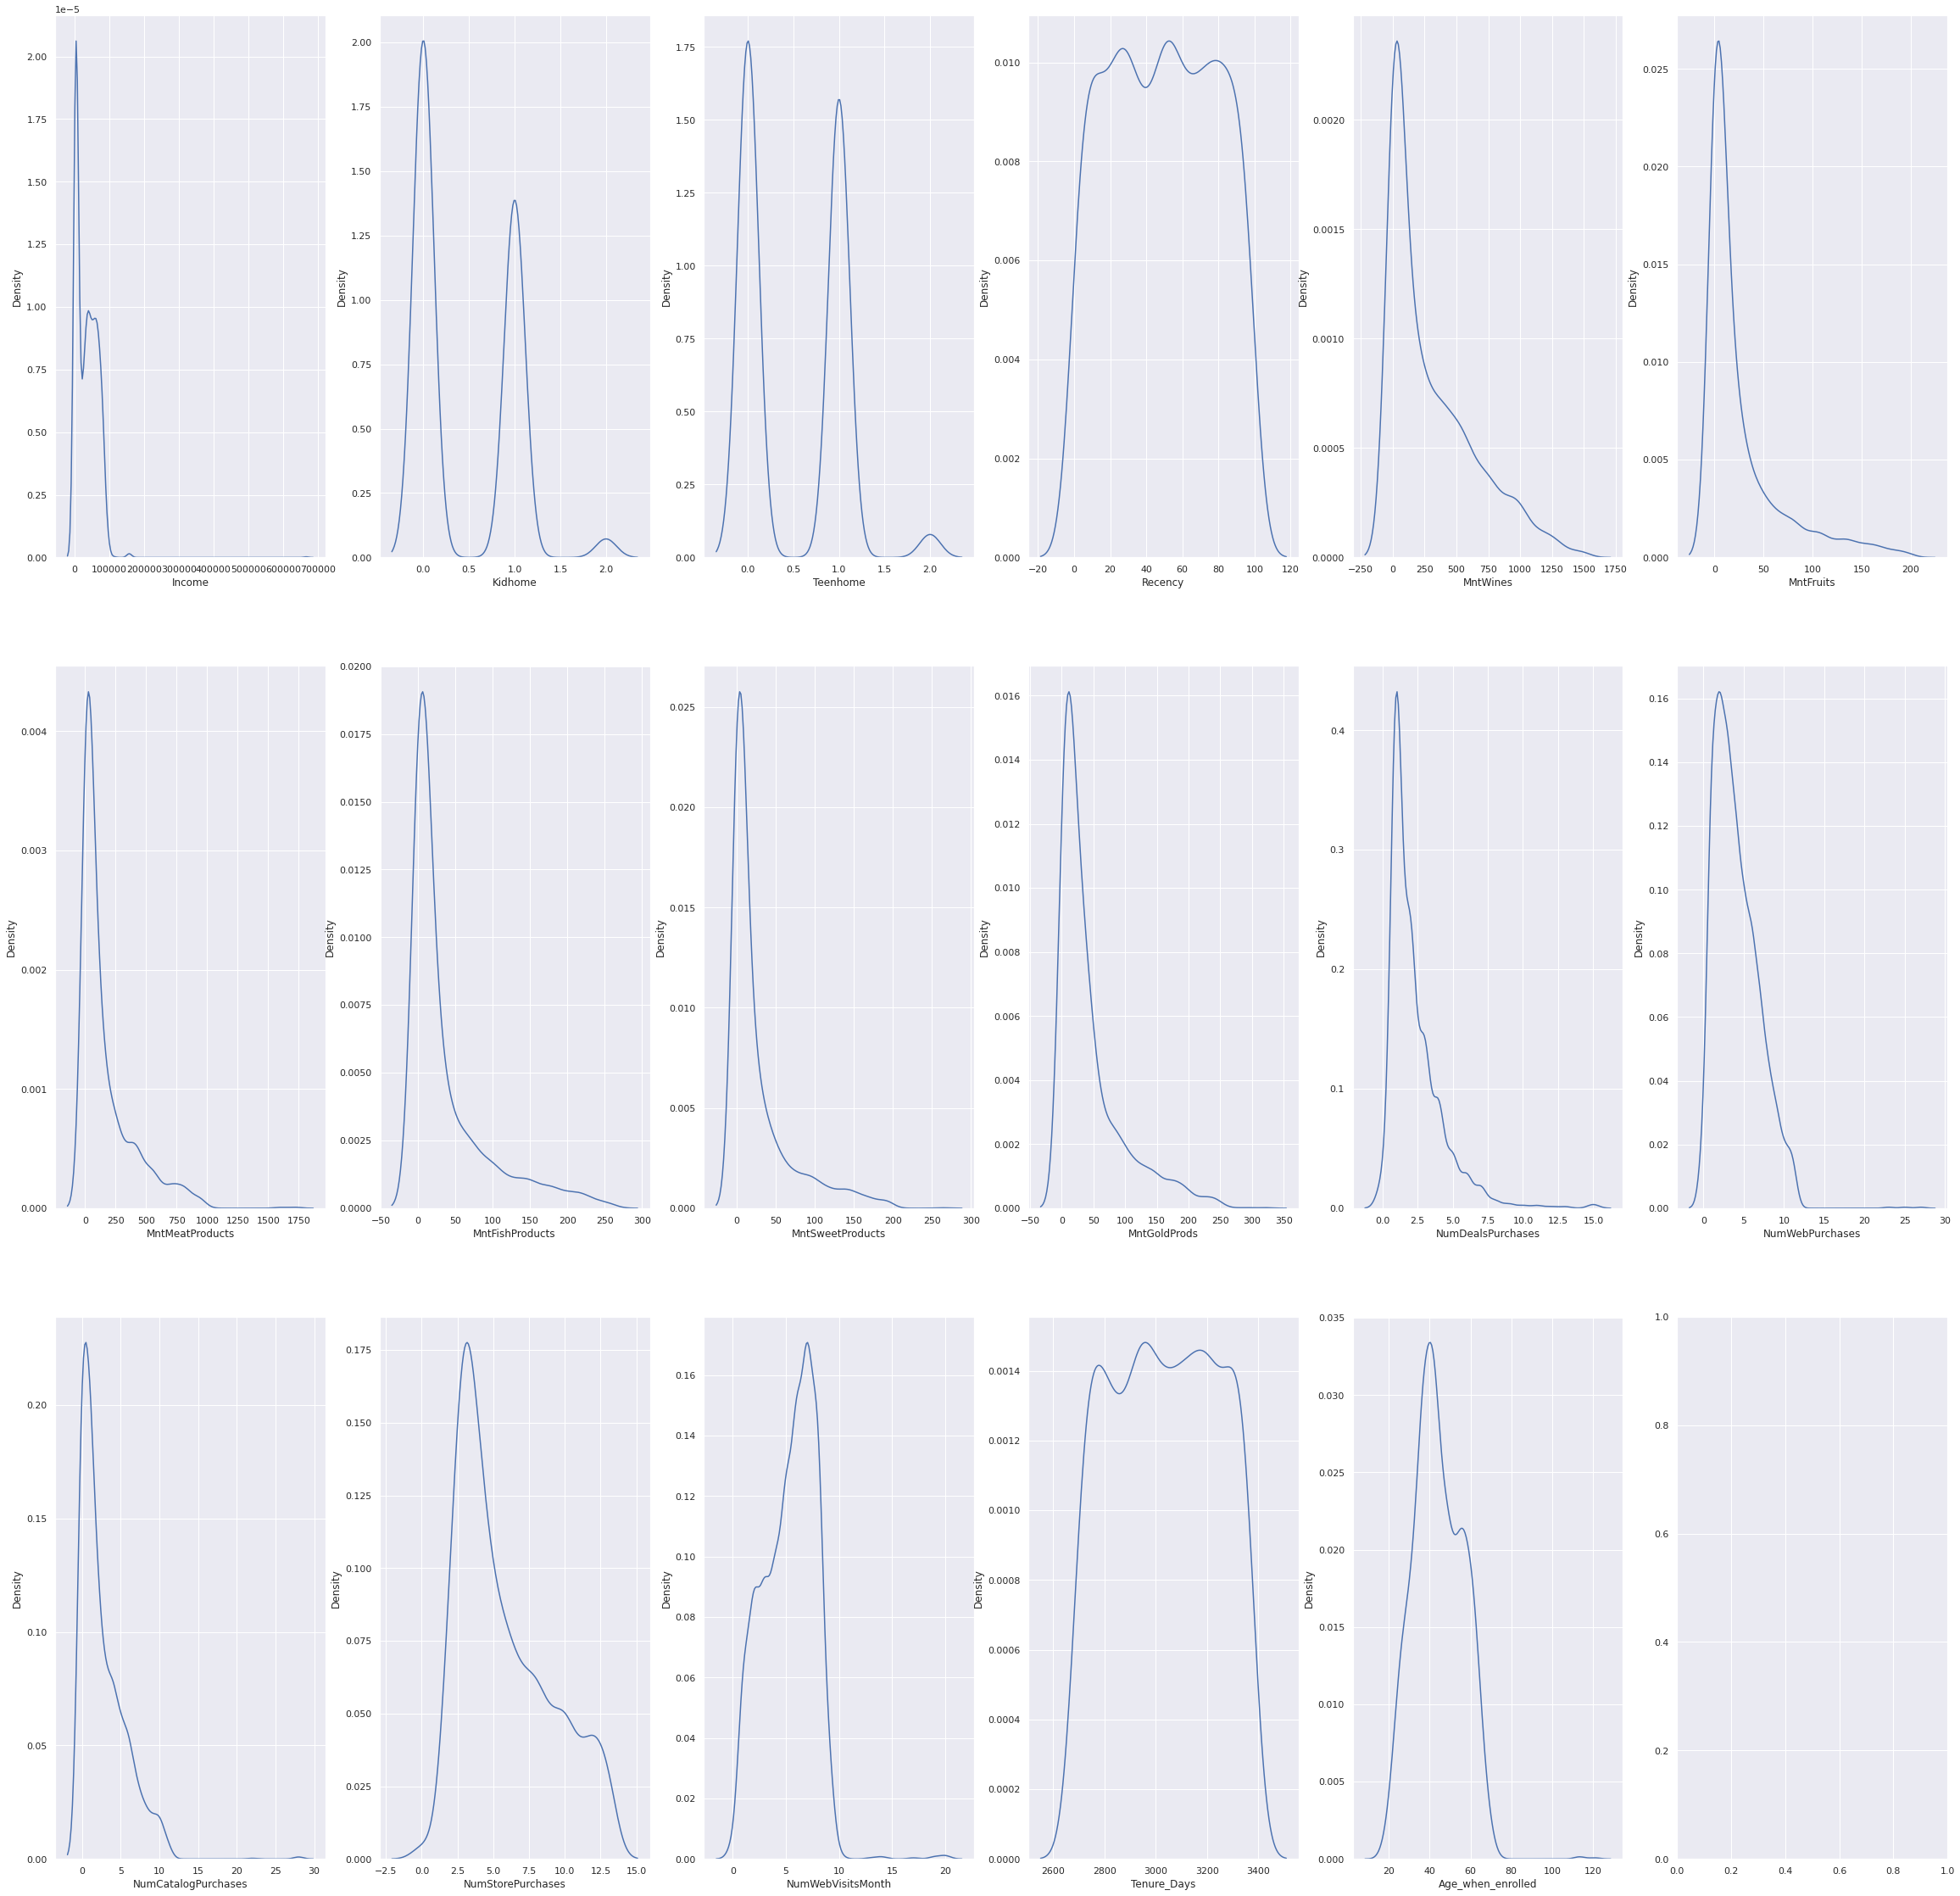

In [ ]:
#Check the outlier existence on continuous data using kde plot
fig, axes = plt.subplots(nrows=3, ncols=6,figsize=(40,40))

for i,el in enumerate(feature):
    a = sns.kdeplot(data=df, x = el, ax=axes.flatten()[i])

plt.show()

We find that there are outlier in feature `Income`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumWebVisitsMonth`, and `Age_when_enrolled`. We also will check the data distribution using KDE Plot.  
Based on the boxplot and kde plot, we can conclude that we will drop the outlier found on feature `Income` and `Age_when_enrolled`. As for the other feature, we can conclude that the outlier found through boxplot is a part of the data because the data is imbalance (dominated by a data group either in the right or left tail) hence the right tail or left tail is a bit longer.

In [ ]:
#get min and max value for feature that will be dropped
drop = ['Income', 'Age_when_enrolled']

Q1 = df[drop].quantile(0.25)
Q3 = df[drop].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)


Min:
 Income              -71859.125
Age_when_enrolled        9.000
dtype: float64

Max:
 Income               136585.875
Age_when_enrolled        81.000
dtype: float64


In [ ]:
#drop the outlier data from dataframe
for x in drop:
  filter_min = df[x]<boxplot_min[x]
  filter_max = df[x]>boxplot_max[x]
  df = df[~(filter_min|filter_max)]

In [ ]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Tenure_Days,Age_when_enrolled
0,Graduation,Divorced,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,SP,2694,44
1,Graduation,Single,5791,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,CA,2695,53
2,Graduation,Married,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,US,2728,56
3,Graduation,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,AUS,2730,47
4,Graduation,Single,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,SP,2763,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,US,3160,37
2236,2n Cycle,Married,3156,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,SP,3204,36
2237,Graduation,Divorced,4631,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,SP,3254,36
2238,Graduation,Married,65819,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,IND,3258,34


## Categorical Data Handling

### Label Encoding for feature `Education`

In [ ]:
#define a funtion to do label encoding on feature education
def label_encoding_education_feature(x):
    if x == 'Graduation':
        return 0
    elif x == 'Basic':
        return 0
    elif x == '2n Cycle':
        return 1
    elif x == 'Master':
        return 1
    else:
        return 2

In [ ]:
#apply defined function on feature education
df['Education'] = df['Education'].apply(label_encoding_education_feature)

df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Tenure_Days,Age_when_enrolled
0,0,Divorced,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,SP,2694,44
1,0,Single,5791,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,CA,2695,53
2,0,Married,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,US,2728,56
3,0,Together,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,AUS,2730,47
4,0,Single,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,SP,2763,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,Divorced,66476,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,US,3160,37
2236,1,Married,3156,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,SP,3204,36
2237,0,Divorced,4631,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,SP,3254,36
2238,0,Married,65819,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,IND,3258,34


### One Hot Encoding for feature `Marital_Status` & `Country`

Since in feature `Marital_Status` there are some feature value with same meaning but different word, then we wil perform string manipulation for this feature value. We will assume that:  
1) 'Together' = 'Married'  
2) 'Widow' = 'Divorced'  
3) 'YOLO' = 'Single'  
4) 'Alone' = 'Single'  
5) 'Absurd' = 'Single'

In [ ]:
#perform string manipulation for feature 'Marital_Status'
def string_manipul_maritalstatus_feature(x):
    if x == 'Together':
        return 'Married'
    elif x == 'Widow':
        return 'Divorced'
    elif x == 'YOLO':
        return 'Single'
    elif x == 'Alone':
        return 'Single'
    elif x == 'Absurd':
        return 'Single'

df['Marital_Status'] = df['Marital_Status'].apply(string_manipul_maritalstatus_feature)

In [ ]:
#One Hot Encoding for categorical variable

df = pd.get_dummies(df, columns=['Marital_Status','Country'],drop_first=True)
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Tenure_Days,Age_when_enrolled,Marital_Status_Married,Marital_Status_Single,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0,84835,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,2694,44,0,0,0,0,0,0,0,1,0
1,0,5791,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,2695,53,0,0,1,0,0,0,0,0,0
2,0,67267,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,2728,56,0,0,0,0,0,0,0,0,1
3,0,32474,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,2730,47,1,0,0,0,0,0,0,0,0
4,0,21474,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,2763,25,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,66476,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,3160,37,0,0,0,0,0,0,0,0,1
2236,1,3156,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,3204,36,0,0,0,0,0,0,0,1,0
2237,0,4631,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,3254,36,0,0,0,0,0,0,0,1,0
2238,0,65819,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,3258,34,0,0,0,0,1,0,0,0,0


# Exploratory Data Analysis

## Target Feature Analysis

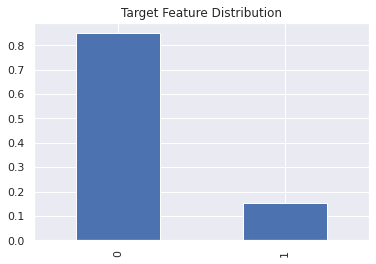

In [ ]:
df['Response'].value_counts(True).plot(kind='bar')
plt.title("Target Feature Distribution")
plt.show()

We can conclude that our data is imbalance (85:15).

## Correlation Analysis

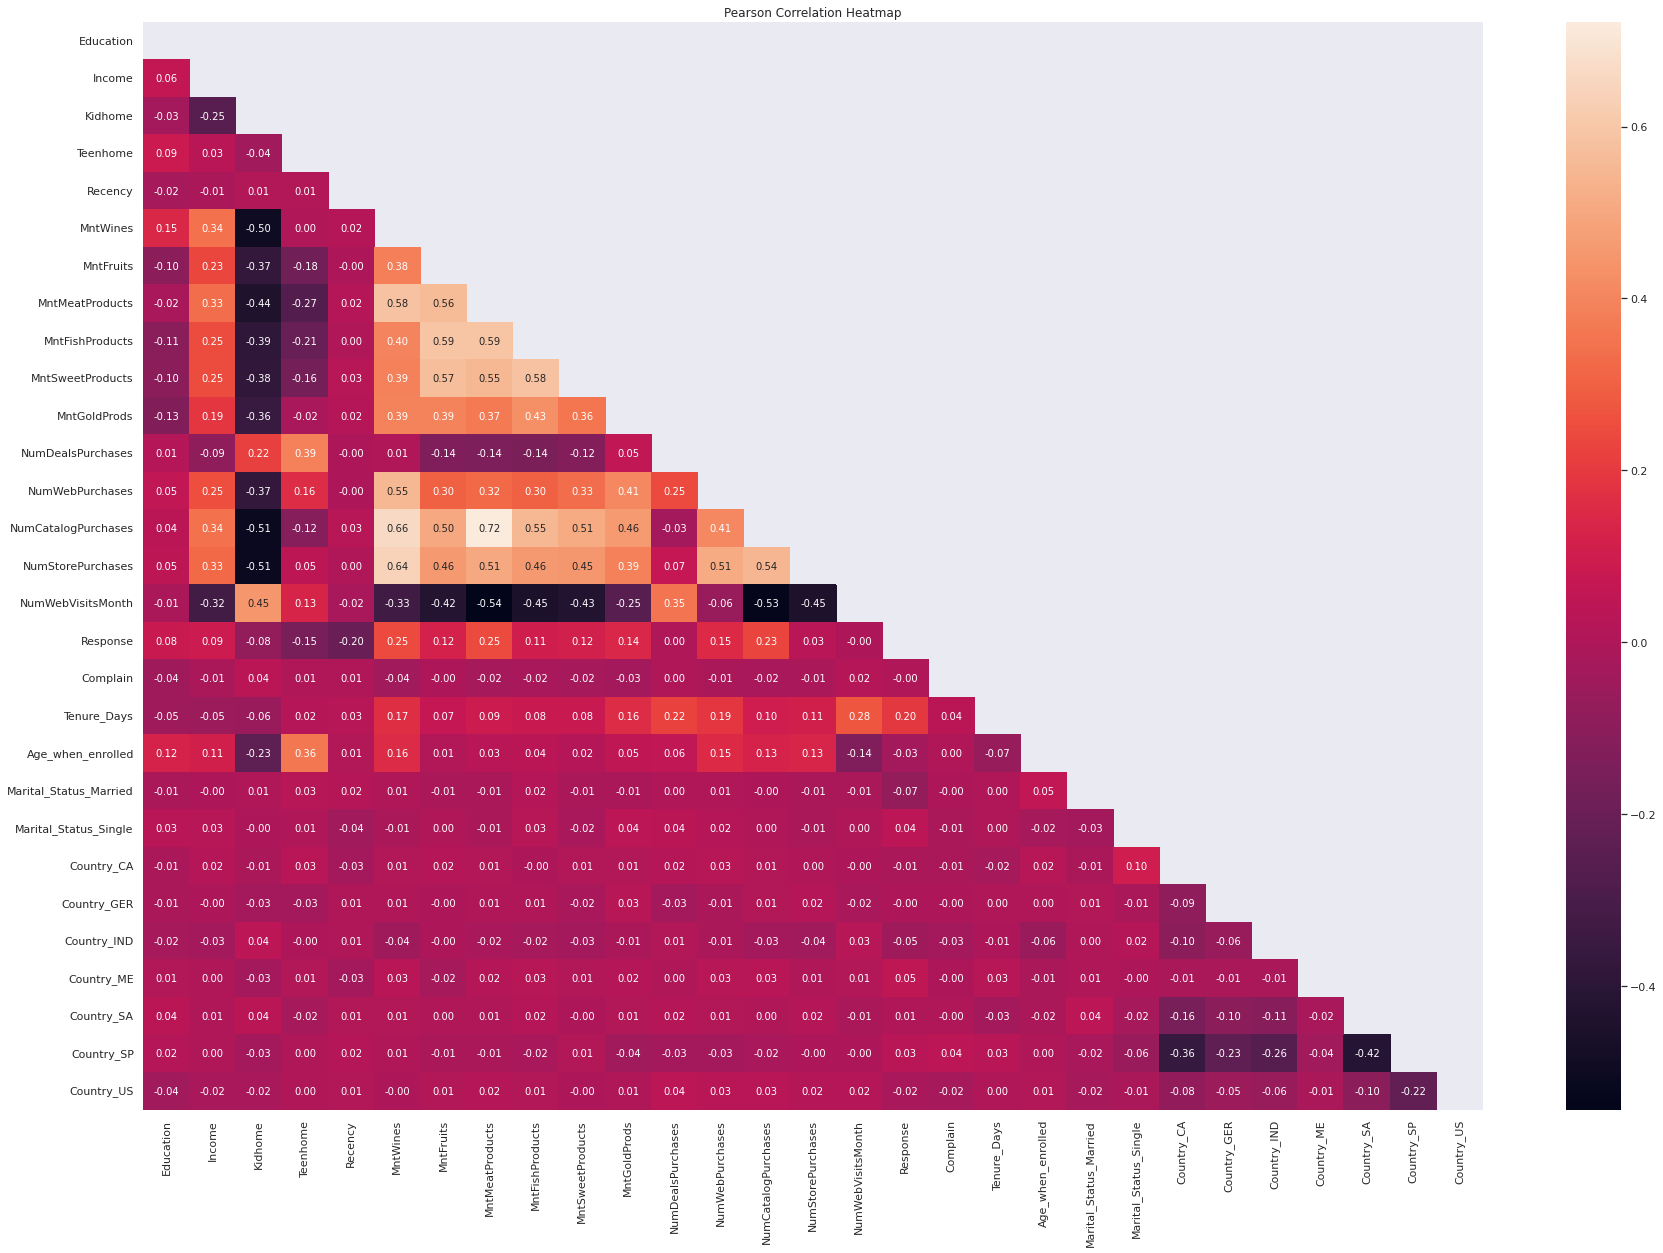

In [ ]:
df_corr = df_final.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(df_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

Based on the correlation plot and using threshold value >= 0.15, we find that there are some features that is strongly correlated with our target variable `Response`. Those features are `Teenhome`, `Recency`, `MntWines`, `MntMeatProducts`, `NumWebPurchases`, `NumCatalogPurchases`, and `Tenure_Days`.

## Data Analysis

Let's trying to visualize and explore the correlation between the feature and target, and also between the feature.


In [ ]:
#we will trying to analyze the acceptance/usage of the campaign based on customer profile (how many family member live inside the house)
df.groupby(['Teenhome', 'Kidhome'])[['Response']].agg({'count','mean'})

Response          
                    count      mean
Teenhome Kidhome                   
0        0            629  0.267091
         1            494  0.133603
         2             17  0.117647
1        0            618  0.080906
         1            368  0.114130
         2             29  0.000000
2        0             30  0.100000
         1             21  0.095238

As we can see that, most of customers with no `Teenhome` at their home, will likely to take the campaign. This probably happened due to the reason that usually most household that has no kid or teenagers at home are more likely to have no complete stock at home and they just buy stuffs when they feel they need that items or when they feel they want to (triggered by hot promo or campaign). Meanwhile, household with many members are more likely to have more comprehensive stock because of the simple reason that they have to cover many people inside the house. Hence, instead of buying things one by one and waiting for the promo or campaign, they prefer to stock the main needs of everyone inside the house. This makes household with many members are more rigid when it comes to impulsive buying triggered by some campaign or promo.

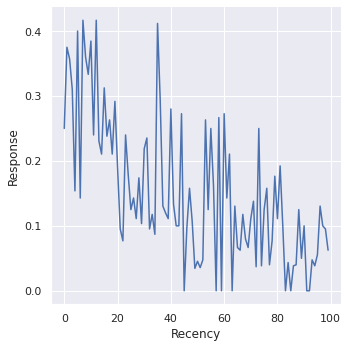

In [ ]:
#Next, we will try to analyze cceptance/usage of the campaign impacted by Recency factor
viz = df.groupby(['Recency'])[['Response']].mean().sort_values(by=['Response'],ascending=False)

sns.relplot(data=viz,
            x='Recency',
            y='Response',
            kind='line')

Based on the chart we can see, that the larger the recency range, the probability for the campaign to be known, accepted, and finally used by customer is decreasing. 

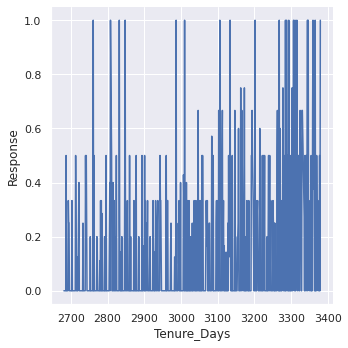

In [ ]:
#Next, we will try to analyze cceptance/usage of the campaign impacted by Tenure_Days (customer life cycle in our ecosystem)
viz = df.groupby(['Tenure_Days'])[['Response']].mean().sort_values(by=['Response'],ascending=False)

sns.relplot(data=viz,
            x='Tenure_Days',
            y='Response',
            kind='line')

We simply know from the chart, that the longer the user registered as our customer does not mean that their acceptance of our campaign will increasing.

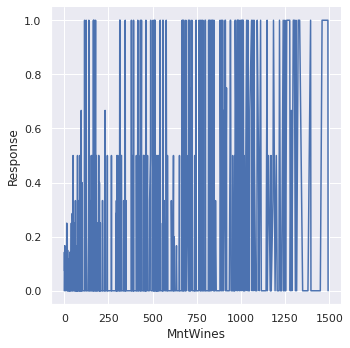

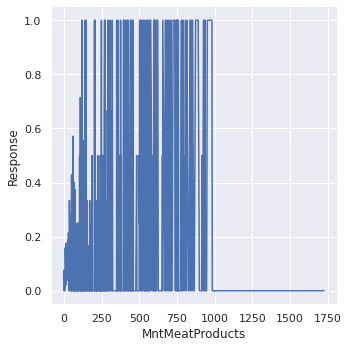

In [ ]:
#Next, we will try to analyze cceptance/usage of the campaign impacted by total amount of products bought by customer in the past (analyze product with high correlation)
viz = df.groupby(['MntWines'])[['Response']].mean().sort_values(by=['Response'],ascending=False)
sns.relplot(data=viz,
            x='MntWines',
            y='Response',
            kind='line')

viz = df.groupby(['MntMeatProducts'])[['Response']].mean().sort_values(by=['Response'],ascending=False)
sns.relplot(data=viz,
            x='MntMeatProducts',
            y='Response',
            kind='line')

Based on the chart we find out that the type of product and amount spent on that product type slightly has impact on the acceptance and usage of the campaign by the customer. We might not need to focus on what kind of product that people usually wish to use a campaign for buying those products.

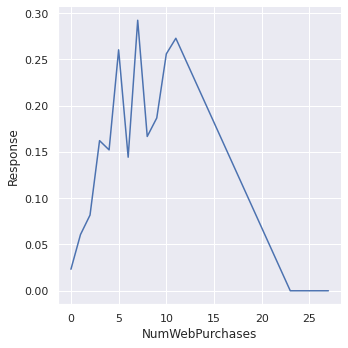

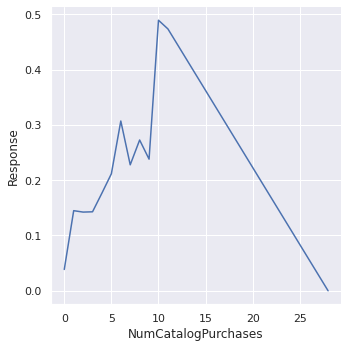

In [ ]:
#Next, we will try to analyze acceptance/usage of the campaign impacted by the medium used for shopping for groceries (analyze medium with high correlation)
viz = df.groupby(['NumWebPurchases'])[['Response']].mean().sort_values(by=['Response'],ascending=False)
sns.relplot(data=viz,
            x='NumWebPurchases',
            y='Response',
            kind='line')

viz = df.groupby(['NumCatalogPurchases'])[['Response']].mean().sort_values(by=['Response'],ascending=False)
sns.relplot(data=viz,
            x='NumCatalogPurchases',
            y='Response',
            kind='line')

As for these feature, we find that there is a turning point which means the more often people shopped through both of the medium analyzed previously, does not mean the probability of the customers accept and use our campaign is always increasing. This may be subject to many reasons, but most of them is depend on why they used the medium. If they use it as a main option because they are not able to use other medium, this may become the reason why on some customer group, their reaction the acceptance of campaign is low even when their frequency of using Web or catalogue is high. Because they simply use the medium as main option without bothering if there is any campaign or not.

# Dataset Modelling

## Split Dataset

In [ ]:
# split the data 
X = df.drop(columns='Response').to_numpy()
y = df[['Response']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## MultiCollinearity Analysis

In [ ]:
#Create df_train to cover multicollinearity analysis purpose
df_X_train = pd.DataFrame(X_train,columns=['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Tenure_Days', 'Age_when_enrolled',
       'Marital_Status_Married', 'Marital_Status_Single', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP', 'Country_US'])
df_y_train = pd.DataFrame(y_train,columns=['Response'])
df_train = pd.concat([df_X_train,df_y_train], axis=1)
df_train

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Tenure_Days,Age_when_enrolled,Marital_Status_Married,Marital_Status_Single,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Response
0,1,5898,1,1,88,285,28,242,55,114,135,13,6,2,12,5,0,3218,57,1,0,0,0,0,0,1,0,0,0
1,1,7429,0,1,70,1121,0,72,0,12,12,4,10,8,10,6,0,3002,42,0,0,0,0,0,0,0,1,0,0
2,0,2426,1,0,66,7,2,8,3,2,3,1,1,0,3,6,0,3159,43,0,0,0,0,0,0,0,1,0,0
3,1,768,0,0,33,173,26,255,35,71,81,1,4,4,7,1,0,2794,49,0,0,0,0,1,0,0,0,0,0
4,0,917,0,0,58,576,172,961,125,115,19,1,8,6,5,3,0,3209,42,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2,7116,0,0,73,707,44,603,95,58,29,1,2,8,12,1,0,3200,41,0,0,0,0,0,0,0,1,0,0
1760,1,5943,0,1,49,31,0,7,2,0,6,1,1,0,3,5,0,3054,57,1,0,0,0,0,0,0,1,0,0
1761,1,54348,1,1,51,70,0,16,0,0,4,2,2,0,4,6,0,2702,61,0,0,1,0,0,0,0,0,0,0
1762,2,25358,0,1,57,19,0,5,0,0,8,2,1,0,3,6,0,3023,66,0,0,0,0,0,0,1,0,0,0


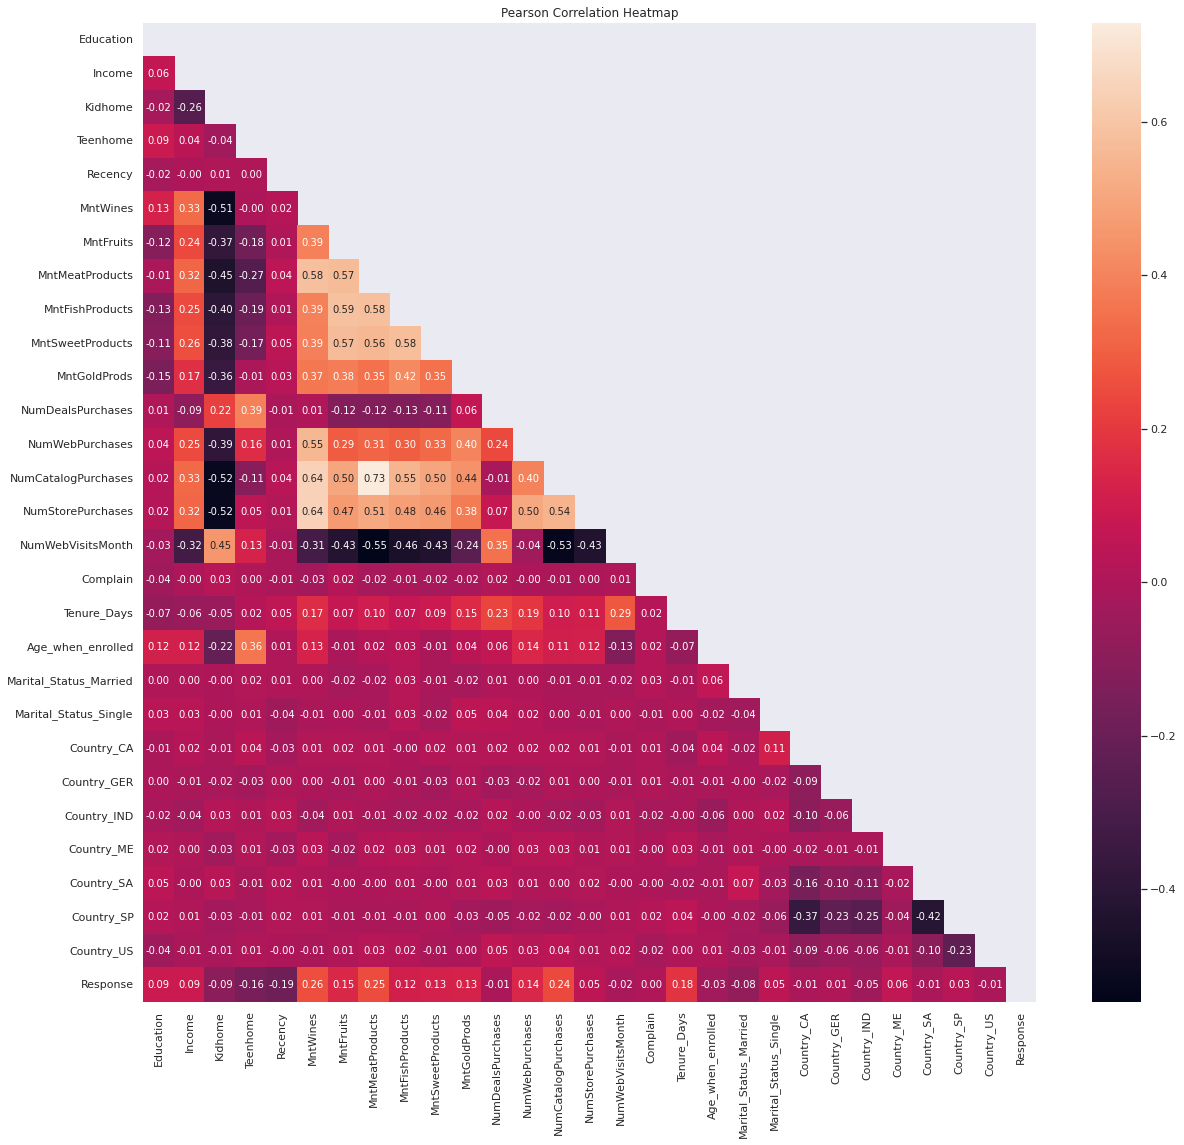

In [ ]:
#Checking Multicollinearity
df_corr_train = df_train.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 18))
ax = sns.heatmap(df_corr_train,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

There is no multicollinearity detected on this dataset. Hence, we can move to next step.

## Machine Learning Model

Since we will trying to model a marketing data to predict campaign acceptance, we will use F1 score as our metric when comparing the models. We absolutely want to target the right customer that will accept our campaign (hence the cost is effectively spent) and do not want to miss the potential customer that will accept our campaign. Due to that reason, we will use F1 score, therefore, we get to minimize rate false positive and minimize rate false negative in our model inline with our goal stated previously.

### Random Forest

In [ ]:
rf_clf = RandomForestClassifier(random_state=42, class_weight={0: 0.05, 1: 0.95})

In [ ]:
#Hyperparameters tuning
parameters = {
    'n_estimators': (10,20,30,40,50),
    'min_samples_split':(2,3,4,5,6)
}

# we will use f1 score
rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, scoring='f1', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 0.05,
                                                                  1: 0.95},
                                                    random_state=42),
                   param_distributions={'min_samples_split': (2, 3, 4, 5, 6),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='f1')

In [ ]:
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'n_estimators': 40, 'min_samples_split': 6}",0.304355,1
8,"{'n_estimators': 20, 'min_samples_split': 6}",0.303372,2
5,"{'n_estimators': 30, 'min_samples_split': 6}",0.302448,3
6,"{'n_estimators': 40, 'min_samples_split': 5}",0.284733,4
7,"{'n_estimators': 50, 'min_samples_split': 5}",0.275300,5
4,"{'n_estimators': 20, 'min_samples_split': 3}",0.244825,6
2,"{'n_estimators': 30, 'min_samples_split': 4}",0.228390,7
0,"{'n_estimators': 30, 'min_samples_split': 3}",0.210692,8
9,"{'n_estimators': 40, 'min_samples_split': 2}",0.192183,9
3,"{'n_estimators': 30, 'min_samples_split': 2}",0.169527,10


The best model hyperparameter value and result: n_estimators = 40, min_samples_split = 6, with f1 score on train dataset 30.4%.

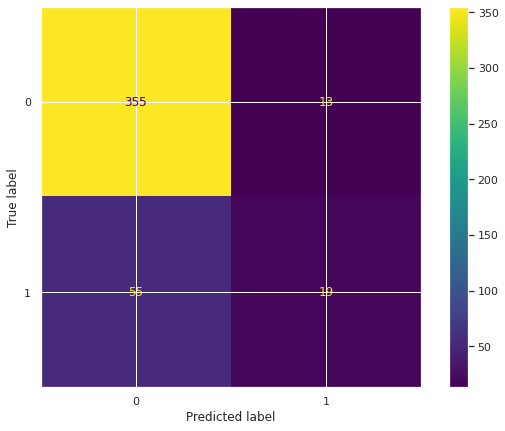

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       368
           1       0.59      0.26      0.36        74

    accuracy                           0.85       442
   macro avg       0.73      0.61      0.64       442
weighted avg       0.82      0.85      0.82       442



We got f1 score on test dataset using random forest 36%. We will try to model the dataset using other model as comparison.

### Logistic Regression

In [ ]:
lr_clf = LogisticRegression(random_state=42, class_weight={0: 0.05, 1: 0.95})

In [ ]:
#Hyperparameters tuning
parameters = {
    'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'penalty': ('l1', 'l2', 'elasticnet', 'none')
}

# we will use recall (sensitivity) as metric since our data is imbalance
lr_clf_randomcv = RandomizedSearchCV(lr_clf, parameters, cv=5, scoring='f1', n_iter=20)
lr_clf_randomcv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg faile

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight={0: 0.05, 1: 0.95},
                                                random_state=42),
                   n_iter=20,
                   param_distributions={'penalty': ('l1', 'l2', 'elasticnet',
                                                    'none'),
                                        'solver': ('newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga')},
                   scoring='f1')

In [ ]:
cv_result = pd.DataFrame(lr_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'solver': 'newton-cg', 'penalty': 'l2'}",0.409279,1
15,"{'solver': 'newton-cg', 'penalty': 'none'}",0.407216,2
2,"{'solver': 'liblinear', 'penalty': 'l1'}",0.388388,3
7,"{'solver': 'liblinear', 'penalty': 'l2'}",0.367763,4
6,"{'solver': 'lbfgs', 'penalty': 'l2'}",0.314509,5
16,"{'solver': 'lbfgs', 'penalty': 'none'}",0.314402,6
9,"{'solver': 'saga', 'penalty': 'l2'}",0.256052,7
18,"{'solver': 'sag', 'penalty': 'none'}",0.256052,7
19,"{'solver': 'saga', 'penalty': 'none'}",0.256052,7
4,"{'solver': 'saga', 'penalty': 'l1'}",0.256052,7


The best model hyperparameter value and result: solver = newton-cg, penalty = I2, with f1 score on train dataset 40.9%.

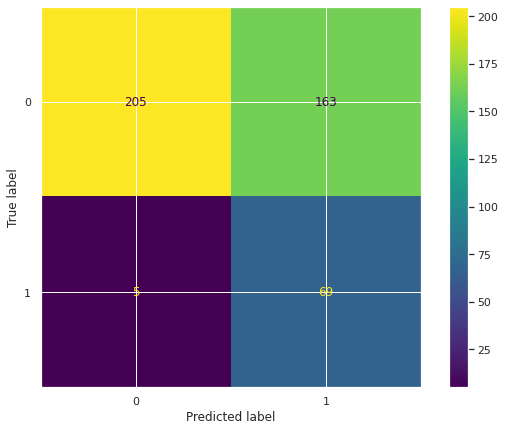

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred = lr_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=lr_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=lr_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
y_pred = lr_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.56      0.71       368
           1       0.30      0.93      0.45        74

    accuracy                           0.62       442
   macro avg       0.64      0.74      0.58       442
weighted avg       0.86      0.62      0.67       442



We got better f1 score on train and test dataset by using logistic regression (40.9% and 45%). The performance difference (compare to Random Forest) is also can be concluded as quite significant.

### Decision Tree

In [ ]:
dt_clf = tree.DecisionTreeClassifier(random_state=42, class_weight={0: 0.05, 1: 0.95})

In [ ]:
#Hyperparameters tuning
parameters = {
    'criterion':('gini', 'entropy'),
    'max_depth':(1,2,3,4,5)
}

# we will use recall (sensitivity) as metric since our data is imbalance
dt_clf_randomcv = RandomizedSearchCV(dt_clf, parameters, cv=5, scoring='f1', n_iter=15)
dt_clf_randomcv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=15. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight={0: 0.05,
                                                                  1: 0.95},
                                                    random_state=42),
                   n_iter=15,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (1, 2, 3, 4, 5)},
                   scoring='f1')

In [ ]:
cv_result = pd.DataFrame(dt_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
9,"{'max_depth': 5, 'criterion': 'entropy'}",0.355222,1
4,"{'max_depth': 5, 'criterion': 'gini'}",0.354952,2
8,"{'max_depth': 4, 'criterion': 'entropy'}",0.353722,3
3,"{'max_depth': 4, 'criterion': 'gini'}",0.349384,4
2,"{'max_depth': 3, 'criterion': 'gini'}",0.340210,5
7,"{'max_depth': 3, 'criterion': 'entropy'}",0.322351,6
0,"{'max_depth': 1, 'criterion': 'gini'}",0.312472,7
5,"{'max_depth': 1, 'criterion': 'entropy'}",0.312472,7
1,"{'max_depth': 2, 'criterion': 'gini'}",0.293595,9
6,"{'max_depth': 2, 'criterion': 'entropy'}",0.290791,10


The best model hyperparameter value and result: max_depth = 5, criterion = entropy, with f1 score on train dataset 35.52%.

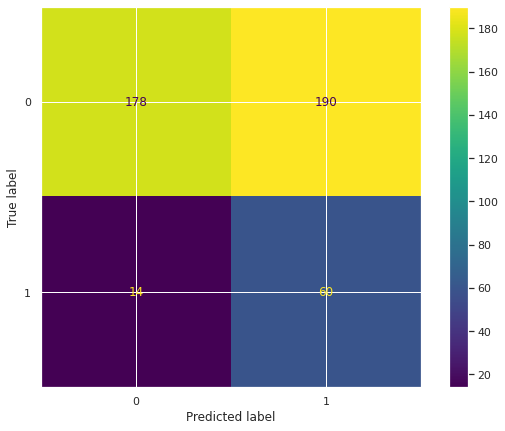

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred = dt_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=dt_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
y_pred = dt_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.48      0.64       368
           1       0.24      0.81      0.37        74

    accuracy                           0.54       442
   macro avg       0.58      0.65      0.50       442
weighted avg       0.81      0.54      0.59       442



We got 37% f1 score using Decision Tree. This score is not any better than previous model which is Logistic Regression.

### XGBoost

In [ ]:
xgb_cla = XGBClassifier(random_state=42, class_weight={0: 0.05, 1: 0.95})

In [ ]:
#Hyperparameters tuning
parameters = {
    'booster':('gbtree', 'gblinear'),
    'max_depth':(3,5,7,9),
    'eta':(0.1,0.2,0.3)
}

# we will use recall (sensitivity) as metric since our data is imbalance
xgb_cla_randomcv = RandomizedSearchCV(xgb_cla, parameters, cv=5, scoring='f1', n_iter=15)
xgb_cla_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(class_weight={0: 0.05, 1: 0.95},
                                           random_state=42),
                   n_iter=15,
                   param_distributions={'booster': ('gbtree', 'gblinear'),
                                        'eta': (0.1, 0.2, 0.3),
                                        'max_depth': (3, 5, 7, 9)},
                   scoring='f1')

In [ ]:
cv_result = pd.DataFrame(xgb_cla_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'max_depth': 7, 'eta': 0.3, 'booster': 'gbtree'}",0.422313,1
13,"{'max_depth': 7, 'eta': 0.2, 'booster': 'gbtree'}",0.422313,1
14,"{'max_depth': 7, 'eta': 0.1, 'booster': 'gbtree'}",0.422313,1
7,"{'max_depth': 5, 'eta': 0.3, 'booster': 'gbtree'}",0.421693,4
11,"{'max_depth': 5, 'eta': 0.2, 'booster': 'gbtree'}",0.421693,4
8,"{'max_depth': 9, 'eta': 0.3, 'booster': 'gbtree'}",0.411097,6
9,"{'max_depth': 9, 'eta': 0.2, 'booster': 'gbtree'}",0.411097,6
12,"{'max_depth': 3, 'eta': 0.1, 'booster': 'gbtree'}",0.389740,8
0,"{'max_depth': 7, 'eta': 0.2, 'booster': 'gblin...",0.220878,9
2,"{'max_depth': 5, 'eta': 0.2, 'booster': 'gblin...",0.220878,9


The best model hyperparameter value and result: max_depth = 7, eta = (0.3 or 0.2 or 0.1), and booster = gbtree, with f1 score on train dataset 42.2%.

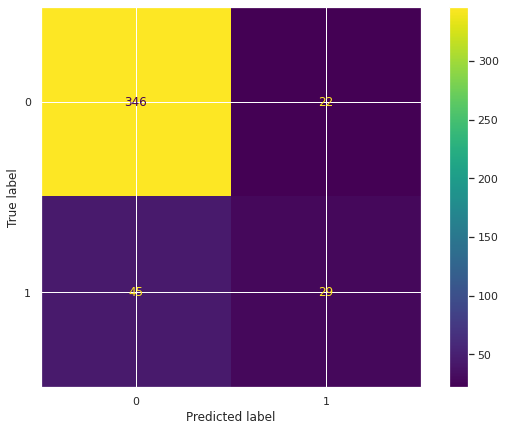

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
y_pred = xgb_cla_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=xgb_cla_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cla_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
y_pred = xgb_cla_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       368
           1       0.57      0.39      0.46        74

    accuracy                           0.85       442
   macro avg       0.73      0.67      0.69       442
weighted avg       0.83      0.85      0.84       442



We got 46% f1 score using XGBoost. This score is the best among all the model that are already built.

### Conclusion based on Chosen Model

Out of 4 models that are already built. We will choose model with highest f1 score in train dataset and test dataset, which is XGBoost Classifier model. The hyperparameter value that will be used can be seen as following:  
max_depth = 7, eta = (0.3 **or** 0.2 **or** 0.1), and booster = gbtree

In [ ]:
xgb_cla = XGBClassifier(random_state=42, class_weight={0: 0.05, 1: 0.95}, booster = 'gbtree', max_depth=7, eta=0.2)
chosen_model = xgb_cla.fit(X_train, y_train)

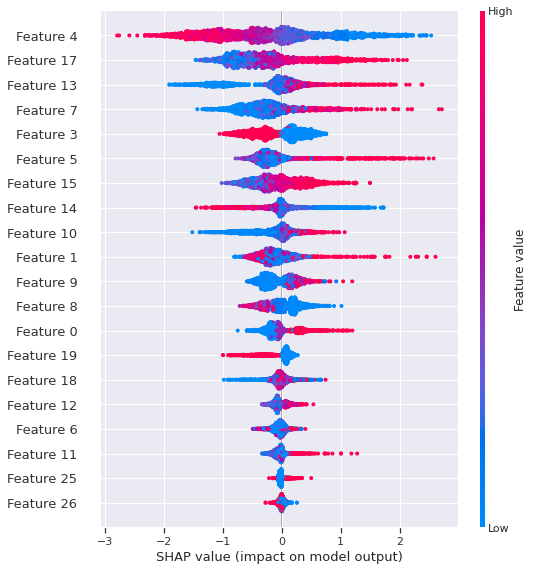

In [ ]:
shap_values = shap.TreeExplainer(chosen_model).shap_values(X)
shap.summary_plot(shap_values, X)

We find that some feature has high impact on the target variable, we can see the feature list below:
1. Feature 4: `Recency`
2. Feature 17: `Tenure Days`
3. Feature 13: `NumCatalogPurchases`
4. Feature 7: `MntMeatProducts`
5. Feature 3: `Teenhome`
6. Feature 5: `MntWines`
7. Feature 15: `NumWebVisitsMonth`

